

















# BLU02 - Learning Notebook - Data wrangling workflows - Part 1 of 3

In [1]:
import numpy as np
import pandas as pd
import os

from sklearn.datasets import load_iris

# About the BLU 

## Data wrangling workflows

A typical data science workflow goes as follows: you get data from a source, you clean it, and then you continuously iterate on it.

![data_transformation_workflow](./media/data_processing_workflow.png)

On the previous learning unit in this specialization, we focused mostly on getting and cleaning data (the blue boxes above). 

At this point, we got a dataset and performed the necessary data cleaning. Our data is, therefore, in an interim state:
* You have a *tidy dataset* (observations as rows and features as columns), comprised of one or more tables
* You know how to import such tables into Pandas, regardless of the format they are stored.

Now, to explore, visualize and model the data, we have to perform transformations on it quick and efficiently, balancing:
* Speed of iteration, testing different hypothesis fast and easy
* Consistency, ensuring our pipeline doesn't collapse along the way.

In this first part, we'll go into how to transform the dataset and explore it in Pandas.

Then, we'll learn how to combine dataframes.

Finally, we'll move to scikit-learn to build efficient pipelines for modeling.

# About the data

The New York Philharmonic played its first concert on December 7, 1842.

The data documents all known concerts, amounting to more than 20,000 performances. Some considerations:
* The Program is the top-most level element in the dataset
* A Program is defined as performances in which the repertoire, conductors, and soloists are the same
* A Program is associated with an Orchestra (e.g., New York Philharmonic) and a Season (e.g., 1842-43)
* A Program may have multiple Concerts with different dates, times and locations
* A Program's repertoire may contain various Works (e.g., two different symphonies by Beethoven)
* A Work can have multiple Soloists (e.g., Mahler on the harpsichord, Strauss or Bernstein on the piano).

**For more information about the dataset, including the data dictionary, please head to the README.**

In this unit, we will be using Works and Concerts, imported as follows.

In [2]:
works = pd.read_csv('./data/works.csv')
concerts = pd.read_csv('./data/concerts.csv')

In [3]:
works.head()

,GUID,ProgramID,WorkID,MovementID,ComposerName,WorkTitle,Movement,ConductorName,Interval,isInterval
0,38e072a7-8fc9-4f9a-8eac-3957905c0002,3853,52446,NaN,"Beethoven, Ludwig van","SYMPHONY NO. 5 IN C MINOR, OP.67",NaN,"Hill, Ureli Corelli",NaN,False
1,c7b2b95c-5e0b-431c-a340-5b37fc860b34,5178,52437,NaN,"Beethoven, Ludwig van","SYMPHONY NO. 3 IN E FLAT MAJOR, OP. 55 (EROICA)",NaN,"Hill, Ureli Corelli",NaN,False
2,894e1a52-1ae5-4fa7-aec0-b99997555a37,10785,52364,1.0,"Beethoven, Ludwig van","EGMONT, OP.84",Overture,"Hill, Ureli Corelli",NaN,False
3,34ec2c2b-3297-4716-9831-b538310462b7,5887,52434,NaN,"Beethoven, Ludwig van","SYMPHONY NO. 2 IN D MAJOR, OP.36",NaN,"Boucher, Alfred",NaN,False
4,610a4acc-94e4-4cd6-bdc1-8ad020edc7e9,305,52453,NaN,"Beethoven, Ludwig van","SYMPHONY NO. 7 IN A MAJOR, OP.92",NaN,"Hill, Ureli Corelli",NaN,False


In [4]:
concerts.head()

,GUID,ProgramID,ConcertID,EventType,Location,Venue,Date,Time
0,38e072a7-8fc9-4f9a-8eac-3957905c0002,3853,0,Subscription Season,"Manhattan, NY",Apollo Rooms,1842-12-07T05:00:00+00:00,8:00PM
1,c7b2b95c-5e0b-431c-a340-5b37fc860b34,5178,0,Subscription Season,"Manhattan, NY",Apollo Rooms,1843-02-18T05:00:00+00:00,8:00PM
2,894e1a52-1ae5-4fa7-aec0-b99997555a37,10785,0,Special,"Manhattan, NY",Apollo Rooms,1843-04-07T05:00:00+00:00,8:00PM
3,34ec2c2b-3297-4716-9831-b538310462b7,5887,0,Subscription Season,"Manhattan, NY",Apollo Rooms,1843-04-22T05:00:00+00:00,8:00PM
4,610a4acc-94e4-4cd6-bdc1-8ad020edc7e9,305,0,Subscription Season,"Manhattan, NY",Apollo Rooms,1843-11-18T05:00:00+00:00,NaN


# 1 Data transformation

## 1.1 Transformations as functions 

Most data transformations operate on dataframes: they receive a local dataframe, transform it and return a new one.

In its simplest form, this is the signature of a generic data transformer.

In [5]:
def data_transformer(df):
    df = df.copy()
    # df = ...
    return df

Such transformations have no side effects and operate as functions on immutable data (i.e., they keep the original dataframe unchanged).

Since the output depends only on the arguments, calling them with the same arguments always produces the same result.

Confusing? Not really.

In [6]:
def rename_column(df, new_name, old_name):
    df = df.copy()
    df[new_name] = df[old_name]
    df = df.drop(columns=old_name)
    return df

def test_dataframe():
    data = np.random.randn(6, 4)
    columns = ['A', 'B', 'C', 'D']
    return pd.DataFrame(data=data, columns=columns)

df = test_dataframe()

rename_column(df, 'Z', 'A')

,B,C,D,Z
0,-1.488442,0.799666,-0.042266,1.037882
1,1.116918,-1.959217,-0.138462,1.117641
2,-2.199247,1.467545,-0.116170,0.899697
3,0.744084,-0.030172,1.402548,-1.595142
4,-0.549713,0.659230,-0.131932,-0.903793
5,-0.052519,-0.449401,1.333927,0.303467


In [7]:
rename_column(df, 'Z', 'A')

,B,C,D,Z
0,-1.488442,0.799666,-0.042266,1.037882
1,1.116918,-1.959217,-0.138462,1.117641
2,-2.199247,1.467545,-0.116170,0.899697
3,0.744084,-0.030172,1.402548,-1.595142
4,-0.549713,0.659230,-0.131932,-0.903793
5,-0.052519,-0.449401,1.333927,0.303467


The same result, see! The program (or Notebook) remembers nothing but the original data and the function itself: a white canvas!

What about the original dataframe?

In [8]:
df

,A,B,C,D
0,1.037882,-1.488442,0.799666,-0.042266
1,1.117641,1.116918,-1.959217,-0.138462
2,0.899697,-2.199247,1.467545,-0.116170
3,-1.595142,0.744084,-0.030172,1.402548
4,-0.903793,-0.549713,0.659230,-0.131932
5,0.303467,-0.052519,-0.449401,1.333927


After each call, the *state* of the program (or Notebook) is the same as it was before (no new objects, no changes, no nothing!), as if nothing happened.

This property is valid for as long as we don't explicitly overwrite the original dataframe outside the function, using an assignment.

In [9]:
df = test_dataframe()
df = rename_column(df, 'Z', 'A')

try:
    rename_column(df, 'Z', 'A')
except:
    print("For some reason this doesn't work. Why is that?")

For some reason this doesn't work. Why is that?


Mutable data is dangerous because it makes programs unpredictable. And this is why you should avoid modifying objects after creation.

Such pitfall is common in Notebooks, especially when you re-run cells, run them in a different order or restart the Kernel. (Am I right?)

**Data transformation is a *pipeline***

Another problem is that data transformation is about applying multiple, sequential changes to the data (i.e., a multistep process).

![data_transformation_pipeline](./media/data_transformation_pipeline.png)

*Fig 2. - A data transformation pipeline is a multistep process.*

And once we realize this, how do we go about it?

In [10]:
df = test_dataframe()

df_renamed = rename_column(df, 'Z', 'A')
# Code happens. Ideas are tested, hours go by.
df_renamed_without_b = df_renamed.drop(columns='B')
# More code happens. We keep on testing ideas, days go by.
df_renamed_without_b_positive = df_renamed_without_b[df_renamed_without_b > 0]
# There's a lot of code. Ideas come and go, we've been doing this for a week.
df_renamed_without_b_positive_no_nans = df_renamed_without_b_positive.dropna(how='all')
# Can we honestly trace back how to get from df to here? Probably not.
df_renamed_without_b_positive_no_nans

,C,D,Z
0,NaN,1.096540,NaN
1,0.088410,NaN,NaN
2,1.570576,1.529113,0.400533
3,0.564976,1.721350,NaN
4,NaN,NaN,0.924495
5,NaN,NaN,0.736827


Using functions instead, you concisely encapsulate everything. 

(Also, you spend less time naming things, unless you want to.)

In [11]:
def data_transformer(df, how_to_dropna):
    df = df.copy()
    df = rename_column(df, 'Z', 'A')
    df = df.drop(columns='B')
    df = df[df > 0]
    df = df.dropna(how=how_to_dropna)
    return df

data_transformer(df, how_to_dropna='all')

,C,D,Z
0,NaN,1.096540,NaN
1,0.088410,NaN,NaN
2,1.570576,1.529113,0.400533
3,0.564976,1.721350,NaN
4,NaN,NaN,0.924495
5,NaN,NaN,0.736827


This function is a bad one: names are not explicit, and there are no apparent blocks of logic.

Functions should organize and document our codebase (*what* you are doing and how).

Using functions, immutable data and avoiding side effects is a smart choice to manage complexity and keep things understandable.

Alternatively, we could structure our functions more like this.

In [12]:
def preprocess_data():
    df = df.copy()
    # df = rename_misspelled_columns(df)
    # df = drop_unnecessary_columns(df)
    # df = keep_only_positive_values(df)
    # df = removemissing_values(df)
    return df

## 1.2 Data transformation in Pandas

Pandas provides convenient methods for most data transformation tasks, with a unified, well-known syntax and consistent interfaces.

For example, we don't need to create a `rename_column()` function, since Pandas already provides a `df.rename()` method for us.

In [13]:
df = test_dataframe()

df.rename({'A': 'Z'}, axis=1)

,Z,B,C,D
0,-0.084453,0.832133,0.276746,0.055949
1,-0.550430,0.592676,-0.467930,-1.477691
2,0.514518,-0.303274,0.573453,-1.287461
3,-0.622986,0.629390,-0.315170,-1.542120
4,-0.424627,0.355939,-0.242733,-1.013048
5,0.224436,0.849439,0.338250,0.127834


As a recap: `df.rename()` follows our transformer signature:
* It takes a dataframe as input 
* And returns a new one as output.

This predictable input/output is what we mean by consistent interfaces! 

It seems very promising to build and multistep pipelines, no? What transformations can we perform this way?

### 1.2.1 Subsetting columns or the index

#### Take a subset of indexes or columns

Pandas implements this functionality, somewhat counterintuitively, as `df.filter()`.

Imagine that we want only the columns related to the work itself, excluding IDs.

In [14]:
work_related_columns = ['ComposerName', 'WorkTitle', 'Movement']
# Select columns by name.
works.filter(items=work_related_columns).head()

,ComposerName,WorkTitle,Movement
0,"Beethoven, Ludwig van","SYMPHONY NO. 5 IN C MINOR, OP.67",NaN
1,"Beethoven, Ludwig van","SYMPHONY NO. 3 IN E FLAT MAJOR, OP. 55 (EROICA)",NaN
2,"Beethoven, Ludwig van","EGMONT, OP.84",Overture
3,"Beethoven, Ludwig van","SYMPHONY NO. 2 IN D MAJOR, OP.36",NaN
4,"Beethoven, Ludwig van","SYMPHONY NO. 7 IN A MAJOR, OP.92",NaN


We can also use it to subset our dataframe based on the index.

In [15]:
# Select rows containing 'Glass' on the index.
works.set_index('ComposerName').filter(like='Glass', axis=0).reset_index().head()

,ComposerName,GUID,ProgramID,WorkID,MovementID,WorkTitle,Movement,ConductorName,Interval,isInterval
0,"Glass, Philip",cf230066-2cd2-4093-8b78-b91b8dda3cbf,11639,5729,NaN,KOYAANISQATSI,NaN,"Riesman, Michael",NaN,False
1,"Glass, Philip",adf68bf5-db9d-4b24-aac6-c9b7c398cf06,14047,12401,NaN,"""FATHER DEATH BLUES"" FROM HYDROGEN JUKEBOX",NaN,"Sainte-Agathe, Valérie",NaN,False
2,"Glass, Philip",990a8f66-cd5f-466e-b3b6-800baa6c0b47-0.1,14189,12547,NaN,"QUARTET, STRING, NO. 3 (MISHIMA)",NaN,NaN,NaN,False
3,"Glass, Philip",3d50968c-2e8b-405f-969c-ba36f941f393,14189,12547,NaN,"QUARTET, STRING, NO. 3 (MISHIMA)",NaN,NaN,NaN,False
4,"Glass, Philip",fb8e7125-7ef9-492e-a820-914467475701,14025,12327,NaN,SARABANDE IN COMMON TIME (SOLO VIOLIN),NaN,NaN,NaN,False


### 1.2.2 Drop columns

Additionally, `GUID` and `ProgramID` are pretty redundant. We can get rid of `GUID`.

In [16]:
works.drop(columns='GUID').head()

,ProgramID,WorkID,MovementID,ComposerName,WorkTitle,Movement,ConductorName,Interval,isInterval
0,3853,52446,NaN,"Beethoven, Ludwig van","SYMPHONY NO. 5 IN C MINOR, OP.67",NaN,"Hill, Ureli Corelli",NaN,False
1,5178,52437,NaN,"Beethoven, Ludwig van","SYMPHONY NO. 3 IN E FLAT MAJOR, OP. 55 (EROICA)",NaN,"Hill, Ureli Corelli",NaN,False
2,10785,52364,1.0,"Beethoven, Ludwig van","EGMONT, OP.84",Overture,"Hill, Ureli Corelli",NaN,False
3,5887,52434,NaN,"Beethoven, Ludwig van","SYMPHONY NO. 2 IN D MAJOR, OP.36",NaN,"Boucher, Alfred",NaN,False
4,305,52453,NaN,"Beethoven, Ludwig van","SYMPHONY NO. 7 IN A MAJOR, OP.92",NaN,"Hill, Ureli Corelli",NaN,False


### 1.2.3 Group By

This is a very extensive topic, and we'll just touch it's surface here, so that you know that exists and can explore it further later on your own.

In case you've worked with SQL before, you'll find this very familiar :)

So, in Pandas there is a process of three chained steps called split-apply-combine:

- split: splitting the DataFrame into groups (this is the groupby), we need to specify the column or the columns that will be used to form the groups.
- apply: apply a function to each group (aggregation, transformation and filtration)
- combine: create a DataFrame with the results

With this out of the way, it's time to focus on three types of functions you may want to apply:
* Aggregation (e.g., sum, count, mean)
* Transformation (e.g., filling missing values)
* Filtration (e.g., discard data from underrepresented groups).

We will drill-down into each one of them. For this next part, we will use be using the `concerts` data.



**Aggregation** (e.g., sum, count, mean)

We want to start by uncovering the most popular programs, by the number of performances.

So the first step is to group our data by `ProgramID`. This returns a DataFrameGroupBy object that by itself doesn't tell us much.

However, we can use the group property of the DataFrameGroupBy object to inspect the groups.


In [17]:
concerts_grouped_by_ProgramID = concerts.groupby('ProgramID')
concerts_grouped_by_ProgramID

In [18]:
concerts_grouped_by_ProgramID.groups

{1: [474, 14097], 2: [1578], 3: [1579], 4: [1580, 14382], 5: [10075], 6: [1581], 7: [10076, 16815, 19224, 20893], 8: [10066], 9: [9471], 10: [7565], 11: [1582], 12: [10077, 16816, 19225, 20894], 13: [10058], 14: [9473], 15: [7566], 16: [154], 17: [3797, 14812], 18: [1583], 19: [10065], 20: [10078, 16817, 19226], 21: [9475], 22: [7567, 15738], 24: [1584], 25: [10063], 26: [10433], 27: [7568], 28: [1585, 14383], 29: [3799, 14813], 30: [10434], 31: [8604, 16117, 18674], 32: [7570, 15739], 33: [3800, 14814], 34: [4466], 35: [1589], 36: [10244], 37: [10435, 16978, 19355, 20978], 38: [8605], 39: [7571, 15740], 40: [4467, 14985, 18285], 41: [3801, 14815], 42: [334], 43: [1164], 44: [10436, 16979, 19356, 20979], 45: [8606, 16118], 46: [7572, 15741], 47: [19], 48: [4470, 14986, 18286], 49: [3803, 14816], 50: [1165, 14308], 51: [9549], 52: [10437, 16980, 19357], 53: [7573], 54: [1168], 55: [4472, 14987], 56: [3805, 14817], 57: [5101, 15174], 58: [9331, 16496, 18968, 20712], 59: [10439, 16981, 19

Now, if we want to know the number of performances per program we can simply call `DataFrameGroupBy.size()`

In [19]:
concerts_grouped_by_ProgramID.size()

ProgramID
1        2
2        1
3        1
4        2
5        1
        ..
14191    2
14192    1
14193    1
14194    1
14195    1
Length: 13932, dtype: int64

The same result but using all the operations together

In [20]:
concerts.groupby('ProgramID').size()

ProgramID
1        2
2        1
3        1
4        2
5        1
        ..
14191    2
14192    1
14193    1
14194    1
14195    1
Length: 13932, dtype: int64

With the operation above we obtain a Dataframe with the number of performances per `ProgramID`. If we want to know the most popular ones we need to use `pd.DataFrame.nlargest()`

In [21]:
concerts.groupby('ProgramID').size().nlargest()

ProgramID
3128     16
3139     16
10700    16
10702    16
3134     12
dtype: int64

We use `GroupBy.size()` to count the number of elements in each group. A list of available methods:
* `mean()`
* `sum()`
* `size()`
* `count()`
* `std()`
* `var()`
* `sem()`
* `describe()`
* `first()`
* `last()`
* `nth()`
* `min()`
* `max()`.

Alternatively, we can use `GroupBy.agg()` as a more general method. Check out the [docs](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html).

You could even define your own aggregation function using the lambda nomenclature, we will see an example of it in the transformation topic.

Let's now imagine that we want to know when each program was performed for the first time.
We start by `groupby` the shows by `ProgramID` and then, for each group we take the `min` of the Date column. 

In [22]:
concerts.groupby('ProgramID').Date.min()

ProgramID
1        1897-02-05T05:00:00+00:00
2        1916-12-03T05:00:00+00:00
3        1916-12-06T05:00:00+00:00
4        1916-12-07T05:00:00+00:00
5        1983-09-14T04:00:00+00:00
                   ...            
14191    2016-12-11T05:00:00+00:00
14192    2017-01-15T05:00:00+00:00
14193    2017-02-03T05:00:00+00:00
14194    2017-03-13T04:00:00+00:00
14195    2017-04-18T04:00:00+00:00
Name: Date, Length: 13932, dtype: object

And if we want to know when it was the last performance?

In [23]:
concerts.groupby('ProgramID').Date.max()

ProgramID
1        1897-02-06T05:00:00+00:00
2        1916-12-03T05:00:00+00:00
3        1916-12-06T05:00:00+00:00
4        1916-12-08T05:00:00+00:00
5        1983-09-14T04:00:00+00:00
                   ...            
14191    2016-12-11T05:00:00+00:00
14192    2017-01-15T05:00:00+00:00
14193    2017-02-03T05:00:00+00:00
14194    2017-03-13T04:00:00+00:00
14195    2017-04-18T04:00:00+00:00
Name: Date, Length: 13932, dtype: object

**Transformation**

The inherent difference between aggregation and transformation is that the latter returns an object the same size as the original input.

We don't have an excellent example in our dataset, so let's use the [Iris](https://archive.ics.uci.edu/ml/datasets/iris) dataset to exemplify a possible use case.

To assign new columns to a DataFrame, you can take advantage of the [`assign`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.assign.html) method from pandas; it accepts the column names as keywords. 

If the column already exists, the current column will be overwritten by the newly assigned values. It is possible to assign multiple columns using the same assign. You can simply pass in multiple columns, separated by a coma.

In [24]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df = df.assign(Target=iris.target)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Now, imagine that we want to standardize the data, but using the statistics for each group:
* We take the mean and the standard deviation *inside each group*
* We want to standardize each value according to that.

We implement it as a lambda function, that will be applied to each group separately.

In [25]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [26]:
zscore = lambda x: (x - x.mean()) / x.std()

df.groupby('Target').transform(zscore).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.266674,0.189941,-0.357011,-0.436492
1,-0.300718,-1.129096,-0.357011,-0.436492
2,-0.868111,-0.601481,-0.932836,-0.436492
3,-1.151807,-0.865288,0.218813,-0.436492
4,-0.017022,0.453749,-0.357011,-0.436492


The downside is that the returned dataframe no longer has `Target` as the column.

Let's try a different approach that allows us to keep the `Target` column

In [27]:
df_transformed = df.groupby('Target').transform(zscore)

df_transformed.groupby(df['Target']).agg(['mean', 'std'])

sepal length (cm)      sepal width (cm)      petal length (cm)       \
                    mean  std             mean  std              mean  std   
Target                                                                       
0          -6.917383e-16  1.0     1.576517e-16  1.0     -1.159073e-15  1.0   
1           5.440093e-17  1.0    -1.513234e-15  1.0      4.529710e-16  1.0   
2           2.753353e-15  1.0    -6.178391e-16  1.0     -9.880985e-16  1.0   

       petal width (cm)       
                   mean  std  
Target                        
0          3.796963e-16  1.0  
1          8.032464e-16  1.0  
2         -9.547918e-16  1.0

We did it! Zero mean and standard deviation equal to one *inside each group*.

Now, if this use case doesn't ring a bell, think about replacing missing values with the group mean, for example. Useful, right?

**Filtration**

The `DataFrameGroupBy.filter()` method provides a convenient way to filter out elements that belong to underrepresented groups.

In [28]:
concerts.groupby('ProgramID').filter(lambda x: x.shape[0] > 15).head()

,GUID,ProgramID,ConcertID,EventType,Location,Venue,Date,Time
6608,8ad0bfa4-09b9-4b18-889b-d0c426410cbb,3128,0,Special,"Manhattan, NY",Roxy Theatre,1950-09-01T04:00:00+00:00,12:00PM
6610,1e1114aa-7152-4305-a357-7aac149b8599,3139,0,Special,"Manhattan, NY",Roxy Theatre,1950-09-08T04:00:00+00:00,NaN
6689,b37d1833-3252-41a6-9f3e-fbd596b215b0,10700,0,Special,"Manhattan, NY",Roxy Theatre,1951-05-09T04:00:00+00:00,12:40PM
6691,35fda061-f4c4-423c-a8ab-feb792caee34,10702,0,Special,"Manhattan, NY",Roxy Theatre,1951-05-16T04:00:00+00:00,NaN
15517,8ad0bfa4-09b9-4b18-889b-d0c426410cbb,3128,1,Special,"Manhattan, NY",Roxy Theatre,1950-09-01T04:00:00+00:00,NaN


It returns a subset of the original dataframe, depending on a function applied to the group as a whole.

### 1.2.4 Method chaining

Now we know about some of the most common individual transformations we can use. But how can we combine them?

Data transformation is a pipeline, i.e., some sequential transformations, *chained* together.

This chaining means that each transformation returns an object that will be consumed by the next one, and so on, in a pre-defined order.

As we've seen, a familiar syntax is to declare intermediate variables for each output, used as input to the next function.

As an example, let's define a simple function that creates the subset of a dataframe based on a mask

In [29]:
def subset(df, mask):
    return df[mask]

In [30]:
mask = works['Interval'].isnull()
df_no_intervals = subset(works,mask)

df_exclude_minor_composers = df_no_intervals.groupby('ComposerName').filter(lambda x: x.shape[0] > 10)

df_work_related = df_exclude_minor_composers.filter(items=work_related_columns)
df_work_related_no_movement = df_work_related.drop(columns='Movement')
df_work_related_no_movement_unique = df_work_related_no_movement.drop_duplicates()

works_per_composer = df_work_related_no_movement_unique.groupby('ComposerName').size()
works_per_composer_sorted = works_per_composer.nlargest()
works_per_composer_sorted

ComposerName
Traditional,                  640
Bach,  Johann  Sebastian      306
Mozart,  Wolfgang  Amadeus    242
Schubert,  Franz              158
Beethoven,  Ludwig  van       144
dtype: int64

These declarations are syntactic sugar: they make it easier to read and express confusing things such as data pipelines. Some downsides:
* We need to create an extra variable per intermediate step
* Cognitive burden of naming each variable and keeping them in mind
* They make the code less fluid
* They make it harder to visualize the whole picture of what your program (or Notebook) is doing
* They are error-prone and heavily reliant on the state, which is dangerous as we've seen.

What if there was an alternative?

Method chaining allows invoking multiple method calls chained together in a single statement, each receiving and returning an object.

This syntax has always been possible with Pandas, but more and more methods are being added to allow you to:
* Receive a dataframe
* Return a transformed dataframe.

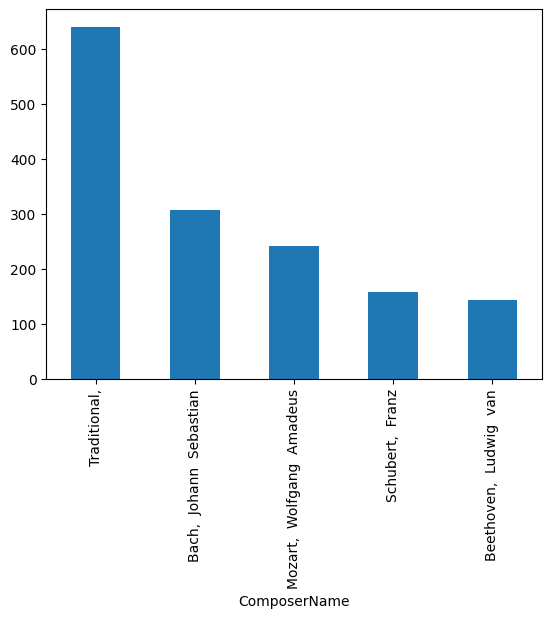

In [31]:
no_intervals = works['Interval'].isnull()
df_no_intervals = subset(works,mask)

df_work_related = df_no_intervals.filter(items=work_related_columns)

(df_work_related.groupby('ComposerName').filter(lambda x: x.shape[0] > 10)
                .drop(columns='Movement')
                .drop_duplicates()
                .groupby('ComposerName').size()
                .nlargest()
                .plot(kind='bar'));

Code flows from top to bottom, and the function parameters are always near the function. 

Also, you eliminate an extra variable for each intermediate step.

Now, explicitly naming things is good. Ideally, you want to chain functions that make sense together and encapsulate them in logically.

In [32]:
def get_top_5_composers(df):
    df = df.copy()
    
    no_intervals = df['Interval'].isnull()
    df = subset(df, no_intervals)
    
    work_related_columns = ['ComposerName', 'WorkTitle', 'Movement']
    
    df = (df.filter(work_related_columns)
            .groupby('ComposerName').filter(lambda x: x.shape[0] > 10)
            .drop(columns='Movement')
            .drop_duplicates()
            .groupby('ComposerName').size()
            .nlargest())
    return df

top_5_composers = get_top_5_composers(works)
top_5_composers

ComposerName
Traditional,                  640
Bach,  Johann  Sebastian      306
Mozart,  Wolfgang  Amadeus    242
Schubert,  Franz              158
Beethoven,  Ludwig  van       144
dtype: int64

Another drawback to excessively long chains is that debugging is harder, as there are no intermediate values to inspect.

**Segregate your code to avoid long chains and keep only together what belongs together.**

(In case of doubt, read [The Zen of Python](https://www.python.org/dev/peps/pep-0020/) out loud ten times.)

### 1.2.5 Custom methods and pipes

Now, for the final trick.

The function `subset()` has the exact signature we want, again:
* It receives a dataframe
* It returns a transformed dataframe.

What if Pandas had a way to include such functions in pipelines? Meet [`df.pipe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pipe.html)!

The method `df.pipe()` allows us to include user-defined functions in method chains (aka pipelines).

It works like this.

/var/folders/vr/h0tx7q8j69zgbwswj_d_cxgm0000gp/T/ipykernel_40103/1755469157.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[mask]


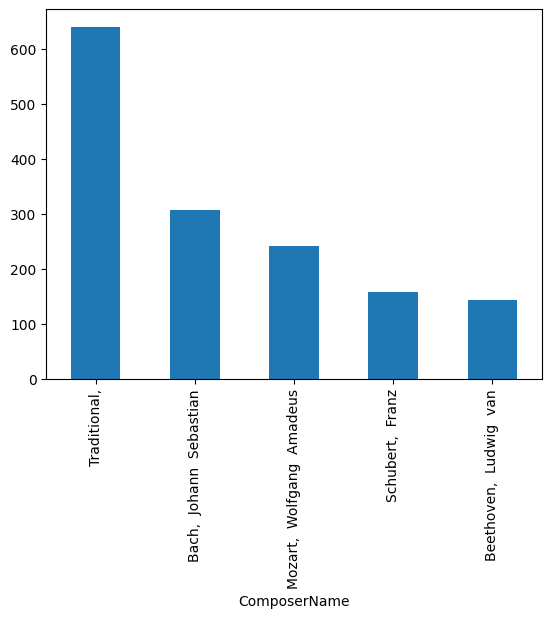

In [33]:
(df_work_related.pipe(subset, no_intervals)
                .filter(items=work_related_columns)
                .groupby('ComposerName').filter(lambda x: x.shape[0] > 10)
                .drop(columns='Movement')
                .drop_duplicates()
                .groupby('ComposerName').size()
                .nlargest()
                .plot(kind='bar'));

So, this should work.

In [34]:
def get_top_5_composers(df):
    no_intervals = df['Interval'].isnull()
    work_related_columns = ['ComposerName', 'WorkTitle', 'Movement']
    
    df = df.copy()
    df = (df.pipe(subset, no_intervals)
            .filter(items=work_related_columns)
            .groupby('ComposerName').filter(lambda x: x.shape[0] > 10)
            .drop(columns='Movement')
            .drop_duplicates()
            .groupby('ComposerName').size()
            .nlargest())
    
    return df

top_5_composers = get_top_5_composers(works)
top_5_composers

ComposerName
Traditional,                  640
Bach,  Johann  Sebastian      306
Mozart,  Wolfgang  Amadeus    242
Schubert,  Franz              158
Beethoven,  Ludwig  van       144
dtype: int64

And it does!

Now, we have all the tools we need to build robust data transformation pipelines in Pandas.

In the next Notebook, you will learn how to combine dataframes.


<hr>
<h2>Learning notebook - Part 1 of 3 - Data wrangling workflows.ipynb</h2>

# BLU02 - Learning Notebook - Data wrangling workflows - Part 2 of 3

In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import os

# 2 Combining dataframes in Pandas

## 2.1 How many programs are there per season?

How many different programs does the NYP typically present per season?

Programs are under `/data/programs/` which contains a file per Season.

### Concatenate

To analyze how many programs there are per season, over time, we need a single dataframe containing *all* seasons.

Concatenation means, in short, to unite multiple dataframes (or series) in one. 

The `pd.concat()` function performs concatenation operations along an axis (`axis=0` for index and `axis=1` for columns).

In [2]:
season_0 = pd.read_csv('./data/programs/1842-43.csv')
season_1 = pd.read_csv('./data/programs/1843-44.csv')

In [3]:
season_0

,GUID,ProgramID,Orchestra,Season
0,38e072a7-8fc9-4f9a-8eac-3957905c0002,3853,New York Philharmonic,1842-43
1,c7b2b95c-5e0b-431c-a340-5b37fc860b34,5178,New York Philharmonic,1842-43
2,894e1a52-1ae5-4fa7-aec0-b99997555a37,10785,Musicians from the New York Philharmonic,1842-43
3,34ec2c2b-3297-4716-9831-b538310462b7,5887,New York Philharmonic,1842-43


In [4]:
season_1

,GUID,ProgramID,Orchestra,Season
0,610a4acc-94e4-4cd6-bdc1-8ad020edc7e9,305,New York Philharmonic,1843-44
1,47b6e9e8-3b18-49ea-ae2a-b9b0ca18902c,3368,New York Philharmonic,1843-44
2,5e533e4f-d4ac-4aaa-b8d2-e189f6806655,4226,New York Philharmonic,1843-44
3,7550f75e-5c0c-4519-9196-05a6c4e2612c,5087,New York Philharmonic,1843-44


In [5]:
seasons = [season_0, season_1]
pd.concat(seasons, axis=1)

,GUID,ProgramID,Orchestra,Season,GUID,ProgramID,Orchestra,Season
0,38e072a7-8fc9-4f9a-8eac-3957905c0002,3853,New York Philharmonic,1842-43,610a4acc-94e4-4cd6-bdc1-8ad020edc7e9,305,New York Philharmonic,1843-44
1,c7b2b95c-5e0b-431c-a340-5b37fc860b34,5178,New York Philharmonic,1842-43,47b6e9e8-3b18-49ea-ae2a-b9b0ca18902c,3368,New York Philharmonic,1843-44
2,894e1a52-1ae5-4fa7-aec0-b99997555a37,10785,Musicians from the New York Philharmonic,1842-43,5e533e4f-d4ac-4aaa-b8d2-e189f6806655,4226,New York Philharmonic,1843-44
3,34ec2c2b-3297-4716-9831-b538310462b7,5887,New York Philharmonic,1842-43,7550f75e-5c0c-4519-9196-05a6c4e2612c,5087,New York Philharmonic,1843-44


Concatenating like this makes no sense, as we no longer have a single observation per row.

What we want to do instead is to concatenate the dataframe along the index.

In [6]:
pd.concat(seasons, axis=0)

,GUID,ProgramID,Orchestra,Season
0,38e072a7-8fc9-4f9a-8eac-3957905c0002,3853,New York Philharmonic,1842-43
1,c7b2b95c-5e0b-431c-a340-5b37fc860b34,5178,New York Philharmonic,1842-43
2,894e1a52-1ae5-4fa7-aec0-b99997555a37,10785,Musicians from the New York Philharmonic,1842-43
3,34ec2c2b-3297-4716-9831-b538310462b7,5887,New York Philharmonic,1842-43
0,610a4acc-94e4-4cd6-bdc1-8ad020edc7e9,305,New York Philharmonic,1843-44
1,47b6e9e8-3b18-49ea-ae2a-b9b0ca18902c,3368,New York Philharmonic,1843-44
2,5e533e4f-d4ac-4aaa-b8d2-e189f6806655,4226,New York Philharmonic,1843-44
3,7550f75e-5c0c-4519-9196-05a6c4e2612c,5087,New York Philharmonic,1843-44


This dataframe looks better, but there's something weird with the index: it's not unique anymore.

Different observations share the same index. Not cool.

For dataframes that don't have a meaningful index, you may wish to ignore the indexes altogether.

In [7]:
pd.concat(seasons, axis=0, ignore_index=True)

,GUID,ProgramID,Orchestra,Season
0,38e072a7-8fc9-4f9a-8eac-3957905c0002,3853,New York Philharmonic,1842-43
1,c7b2b95c-5e0b-431c-a340-5b37fc860b34,5178,New York Philharmonic,1842-43
2,894e1a52-1ae5-4fa7-aec0-b99997555a37,10785,Musicians from the New York Philharmonic,1842-43
3,34ec2c2b-3297-4716-9831-b538310462b7,5887,New York Philharmonic,1842-43
4,610a4acc-94e4-4cd6-bdc1-8ad020edc7e9,305,New York Philharmonic,1843-44
5,47b6e9e8-3b18-49ea-ae2a-b9b0ca18902c,3368,New York Philharmonic,1843-44
6,5e533e4f-d4ac-4aaa-b8d2-e189f6806655,4226,New York Philharmonic,1843-44
7,7550f75e-5c0c-4519-9196-05a6c4e2612c,5087,New York Philharmonic,1843-44


Now, let's try something different. 

Let's try to change the name of the columns, so that each dataframe has different ones, before concatenating.

In [8]:
season_0_ = season_0.copy()
season_0_.columns = [0, 1, 2, 'Season']
seasons_ = [season_0_, season_1]
pd.concat(seasons_, axis=0)

,0,1,2,Season,GUID,ProgramID,Orchestra
0,38e072a7-8fc9-4f9a-8eac-3957905c0002,3853.0,New York Philharmonic,1842-43,NaN,NaN,NaN
1,c7b2b95c-5e0b-431c-a340-5b37fc860b34,5178.0,New York Philharmonic,1842-43,NaN,NaN,NaN
2,894e1a52-1ae5-4fa7-aec0-b99997555a37,10785.0,Musicians from the New York Philharmonic,1842-43,NaN,NaN,NaN
3,34ec2c2b-3297-4716-9831-b538310462b7,5887.0,New York Philharmonic,1842-43,NaN,NaN,NaN
0,NaN,NaN,NaN,1843-44,610a4acc-94e4-4cd6-bdc1-8ad020edc7e9,305.0,New York Philharmonic
1,NaN,NaN,NaN,1843-44,47b6e9e8-3b18-49ea-ae2a-b9b0ca18902c,3368.0,New York Philharmonic
2,NaN,NaN,NaN,1843-44,5e533e4f-d4ac-4aaa-b8d2-e189f6806655,4226.0,New York Philharmonic
3,NaN,NaN,NaN,1843-44,7550f75e-5c0c-4519-9196-05a6c4e2612c,5087.0,New York Philharmonic


What a mess! What did we learn?

* When the dataframes have different columns, `pd.concat()` will take the union of all dataframes by default (no information loss)
* Concatenation will fill columns that are not present for specific dataframes with `np.NaN` (missing values).

The good news is that you can set how you want to glue the dataframes in regards to the other axis, the one not being concatenated. 

Setting `join='inner'` will take the intersection, i.e., the columns that are present in all dataframes.

In [9]:
pd.concat(seasons_, axis=0, join='inner')

,Season
0,1842-43
1,1842-43
2,1842-43
3,1842-43
0,1843-44
1,1843-44
2,1843-44
3,1843-44


There you go. Concatenation complete.

Let's use `pd.concat` to combine all seasons into a great dataframe.

In [10]:
def read_season(file):
    path = os.path.join('.', 'data', 'programs', file)
    return pd.read_csv(path)

files = os.listdir('./data/programs/')
files = [f for f in files if '.csv' in f]

A logical approach would be to iterate over all files and concatenating all of them into a single dataframe.

In [11]:
%%timeit

programs = pd.DataFrame()
for file in files:
    season = read_season(file)
    programs = pd.concat([programs, season], ignore_index=True, axis=0)

244 ms ± 8.48 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


It is worth nothing that `pd.concat()` makes a full copy of the data, and continually reusing this function can create a significant performance hit. 

Instead, use a list comprehension if you need to use the operation several times. 

This way, you only call `pd.concat()` once.

In [12]:
%%timeit

seasons = [read_season(f) for f in files if '.csv' in f]
programs = pd.concat(seasons, axis=0, ignore_index=True)

171 ms ± 2.02 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
seasons = [read_season(f) for f in files if '.csv' in f]
programs = pd.concat(seasons, axis=0, ignore_index=True)

Now that we have the final `programs` dataframe, we can see how the number of distinct programs changes over time.

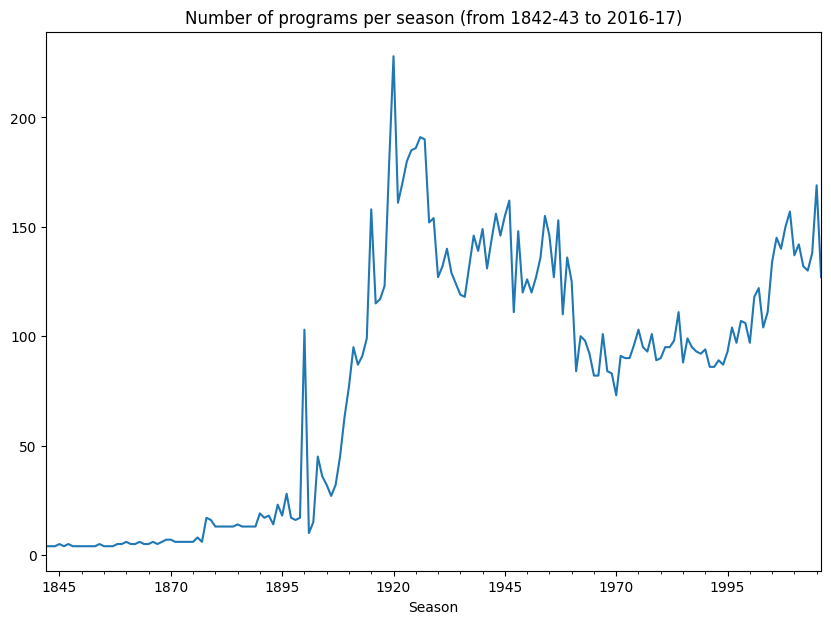

In [14]:
programs['Season'] = pd.to_datetime(programs['Season'].str[:4])

(programs.groupby('Season')
         .size()
         .plot(legend=False, use_index=True, figsize=(10, 7),
               title='Number of programs per season (from 1842-43 to 2016-17)'));

The NYP appears to be investing in increasing the number of distinct programs per season since '95. 

## 2.2 How many concerts are there per season?

What about the number of concerts? The first thing we need to do is to import the `concerts.csv` data.

In [15]:
concerts = pd.read_csv('./data/concerts.csv')
concerts.head()

,GUID,ProgramID,ConcertID,EventType,Location,Venue,Date,Time
0,38e072a7-8fc9-4f9a-8eac-3957905c0002,3853,0,Subscription Season,"Manhattan, NY",Apollo Rooms,1842-12-07T05:00:00+00:00,8:00PM
1,c7b2b95c-5e0b-431c-a340-5b37fc860b34,5178,0,Subscription Season,"Manhattan, NY",Apollo Rooms,1843-02-18T05:00:00+00:00,8:00PM
2,894e1a52-1ae5-4fa7-aec0-b99997555a37,10785,0,Special,"Manhattan, NY",Apollo Rooms,1843-04-07T05:00:00+00:00,8:00PM
3,34ec2c2b-3297-4716-9831-b538310462b7,5887,0,Subscription Season,"Manhattan, NY",Apollo Rooms,1843-04-22T05:00:00+00:00,8:00PM
4,610a4acc-94e4-4cd6-bdc1-8ad020edc7e9,305,0,Subscription Season,"Manhattan, NY",Apollo Rooms,1843-11-18T05:00:00+00:00,NaN


We will use the Leon Levy Digital Archives ID (`GUID`) to identify each program.

Now, we have information regarding all the concerts that took place and the season for each program.

The problem? Information about the concert and the season are in different tables, and the program is the glue between the two. Familiar?

### Merge

Pandas provides high-performance join operations, very similar to SQL.

The method `df.merge()` provides an interface for all database-like join methods. If you ever wonder how to use a certain method from pandas (or any library), put a question mark before the method to check for its documentation.

In [16]:
?pd.merge

We can call `pd.merge` to join both tables on `GUID`, as well as `ProgramID`, which provides similar info).

In [17]:
# Since GUID and ProgramID offer similar info, we will drop the latter.
programs = programs.drop(columns='ProgramID')

df = pd.merge(programs, concerts, on='GUID')
df.head()

,GUID,Orchestra,Season,ProgramID,ConcertID,EventType,Location,Venue,Date,Time
0,add7e348-110f-4db2-a1b1-ff2d977ae000,New York Philharmonic,2016-01-01,13889,0,Non-Subscription,"Manhattan, NY",David Geffen Hall,2016-09-13T04:00:00+00:00,7:30PM
1,add7e348-110f-4db2-a1b1-ff2d977ae000,New York Philharmonic,2016-01-01,13889,1,Non-Subscription,"Manhattan, NY",David Geffen Hall,2016-09-14T04:00:00+00:00,7:30PM
2,add7e348-110f-4db2-a1b1-ff2d977ae000,New York Philharmonic,2016-01-01,13889,2,Non-Subscription,"Manhattan, NY",David Geffen Hall,2016-09-15T04:00:00+00:00,7:30PM
3,ff89e300-b0f2-40cd-b1ab-4b43f02047d3,New York Philharmonic,2016-01-01,13890,0,Non-Subscription,"Manhattan, NY",David Geffen Hall,2016-09-16T04:00:00+00:00,8:00PM
4,2b5083e6-806e-47dc-81ce-00086f2b4377,New York Philharmonic,2016-01-01,14068,0,Non-Subscription,"Manhattan, NY",David Geffen Hall,2016-09-17T04:00:00+00:00,8:00PM


Or, alternatively, we can call `merge()` directly on the dataframe.

In [18]:
df_ = programs.merge(concerts, on='GUID')
df_.head()

,GUID,Orchestra,Season,ProgramID,ConcertID,EventType,Location,Venue,Date,Time
0,add7e348-110f-4db2-a1b1-ff2d977ae000,New York Philharmonic,2016-01-01,13889,0,Non-Subscription,"Manhattan, NY",David Geffen Hall,2016-09-13T04:00:00+00:00,7:30PM
1,add7e348-110f-4db2-a1b1-ff2d977ae000,New York Philharmonic,2016-01-01,13889,1,Non-Subscription,"Manhattan, NY",David Geffen Hall,2016-09-14T04:00:00+00:00,7:30PM
2,add7e348-110f-4db2-a1b1-ff2d977ae000,New York Philharmonic,2016-01-01,13889,2,Non-Subscription,"Manhattan, NY",David Geffen Hall,2016-09-15T04:00:00+00:00,7:30PM
3,ff89e300-b0f2-40cd-b1ab-4b43f02047d3,New York Philharmonic,2016-01-01,13890,0,Non-Subscription,"Manhattan, NY",David Geffen Hall,2016-09-16T04:00:00+00:00,8:00PM
4,2b5083e6-806e-47dc-81ce-00086f2b4377,New York Philharmonic,2016-01-01,14068,0,Non-Subscription,"Manhattan, NY",David Geffen Hall,2016-09-17T04:00:00+00:00,8:00PM


The critical parameter here is the `how`. Since we are not explicitly using it, the merge defaults to `inner` (for inner-join).

But, in fact, you can use any join, just like you did in SQL: `left`, `right`, `outer`, and `inner`.

Remember?

![](./media/types_of_joins.jpg)

*Fig. 1 - Types of joins in SQL; note how left, right, outer and inner translate directly to Pandas.*

A refresher on different types of joins, all supported by Pandas:

| Pandas                                         | SQL              | What it does                              |
| ---------------------------------------------- | ---------------- | ----------------------------------------- |
| `pd.merge(right, left, on='key', how='left')`  | LEFT OUTER JOIN  | Use all keys from left frame only         |
| `pd.merge(right, left, on='key', how='right')` | RIGHT OUTER JOIN | Use all keys from right frame only        |
| `pd.merge(right, left, on='key', how='outer')` | FULL OUTER JOIN  | Use union of keys from both frames        |
| `pd.merge(right, left, on='key', how='inner')` | INNER JOIN       | Use intersection of keys from both frames |

In this particular case, we have:
* A one-to-many relationship (i.e., one program to many concerts)
* Since every single show in `concerts` has a match in `programs`, the type of join we use doesn't matter.

We can use the `validate` argument to automatically check whether there are unexpected duplicates in the merge keys and check their uniqueness.

In [19]:
df__ = pd.merge(programs, concerts, on='GUID', how='outer', validate="one_to_many")
assert(concerts.shape[0] == df_.shape[0] == df__.shape[0])

Back to our question, how is the number of concerts per season evolving?

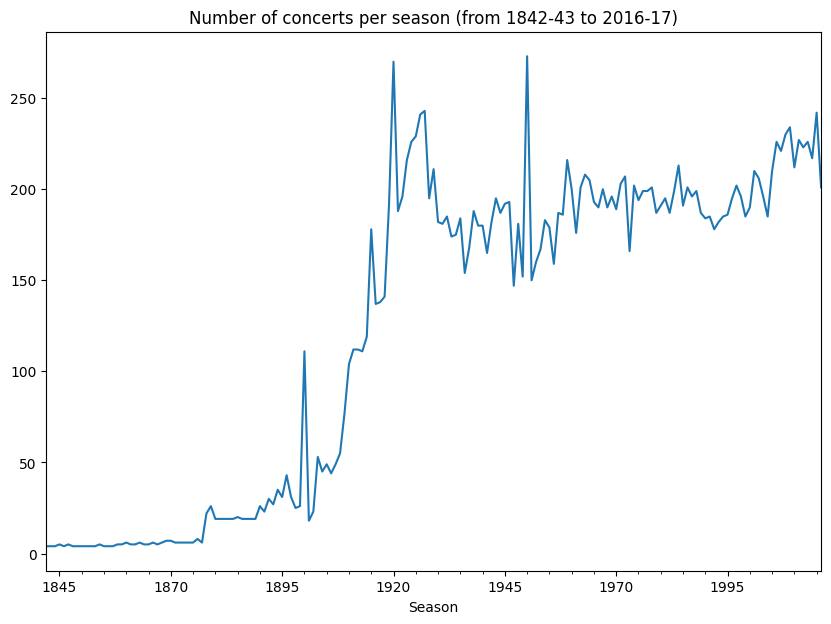

In [20]:
(programs.merge(concerts, on='GUID')
         .groupby('Season')
         .size()
         .plot(legend=False, use_index=True, figsize=(10, 7),
               title='Number of concerts per season (from 1842-43 to 2016-17)'));

Likewise, the number of concerts seems to be trending upwards since about 1995, which could be a sign of growing interest in the genre.

### Join

Now, we want the top-3 composer in total appearances.

Without surprise, we start by importing `works.csv`.

In [21]:
works = pd.read_csv('./data/works.csv',index_col='GUID')

Alternatively, we can use `df.join()` instead of `df.merge()`. 

There are, however, differences in the default behavior: for example `df.join` uses `how='left'` by default.

Let's try to perform the merge.

In [22]:
(programs.merge(works, on="GUID")
         .head(n=3))

,GUID,Orchestra,Season,ProgramID,WorkID,MovementID,ComposerName,WorkTitle,Movement,ConductorName,Interval,isInterval
0,add7e348-110f-4db2-a1b1-ff2d977ae000,New York Philharmonic,2016-01-01,13889,5733,NaN,"Bernstein, Leonard",WEST SIDE STORY (WITH FILM),NaN,"Newman, David",NaN,False
1,add7e348-110f-4db2-a1b1-ff2d977ae000,New York Philharmonic,2016-01-01,13889,0,NaN,NaN,NaN,NaN,NaN,Intermission,True
2,ff89e300-b0f2-40cd-b1ab-4b43f02047d3,New York Philharmonic,2016-01-01,13890,12070,NaN,"Gershwin, George",MANHATTAN (FILM) (ARR. Pierson),NaN,"Gilbert, Alan",NaN,False


In [23]:
programs.merge(works, on="GUID").shape

(82576, 12)

In [24]:
(programs.join(works, on='GUID')
         .head(n=3))

# equivalent to
# pd.merge(programs, works, left_on='GUID', right_index=True,
#          how='left').head(n=3)

,GUID,Orchestra,Season,ProgramID,WorkID,MovementID,ComposerName,WorkTitle,Movement,ConductorName,Interval,isInterval
0,add7e348-110f-4db2-a1b1-ff2d977ae000,New York Philharmonic,2016-01-01,13889.0,5733.0,NaN,"Bernstein, Leonard",WEST SIDE STORY (WITH FILM),NaN,"Newman, David",NaN,False
0,add7e348-110f-4db2-a1b1-ff2d977ae000,New York Philharmonic,2016-01-01,13889.0,0.0,NaN,NaN,NaN,NaN,NaN,Intermission,True
1,ff89e300-b0f2-40cd-b1ab-4b43f02047d3,New York Philharmonic,2016-01-01,13890.0,12070.0,NaN,"Gershwin, George",MANHATTAN (FILM) (ARR. Pierson),NaN,"Gilbert, Alan",NaN,False


In [25]:
programs.join(works, on="GUID").shape

(82623, 12)

We noticed that the shape of the results is diferent, since we have a different number of lines in each one of the methods.
Typically, you would use `df.join()` when you want to do a left join or when you want to join on the index of the dataframe on the right.

Now for our goal: what are the top-3 composers?

In [26]:
(programs.join(works, on='GUID')
         .groupby('ComposerName')
         .size()
         .nlargest(n=3))

ComposerName
Wagner,  Richard               4923
Beethoven,  Ludwig  van        4534
Tchaikovsky,  Pyotr  Ilyich    3700
dtype: int64

Wagner wins!

What about the top-3 works?

In [27]:
(programs.join(works, on='GUID')
         .groupby(['ComposerName', 'WorkTitle'])
         .size()
         .nlargest(n=3))

ComposerName      WorkTitle                        
Wagner,  Richard  MEISTERSINGER, DIE, WWV 96           784
                  TANNHAUSER, WWV 70                   599
                  GOTTERDAMMERUNG [GÖTTERDÄMMERUNG]    592
dtype: int64

Wagner wins again!


<hr>
<h2>Learning notebook - Part 2 of 3 - Combining dataframes.ipynb</h2>

# BLU02 - Learning Notebook - Data wrangling workflows - Part 3 of 3

In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import os

from category_encoders.ordinal import OrdinalEncoder

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# 3 Advanced pipelines in scikit-learn

Remember our workflow diagram? Let's look at it again.

![data_transformation_workflow](./media/data_processing_workflow.png)

*Fig 1. - A standard workflow (again).*

Pandas, as amazing as it is, can only take us so far.

There, beyond the known universe, lies **modeling**.

Where we are at this point:
* We are able to perform transformations on data, setting up robust pipelines using nothing but Pandas
* We can combine different dataframes, to enrich our datasets or generate new ones.

Thus, here we are, with modeling lying right ahead of us. What's exactly new about modeling though?

We will be using the same dataset, but this time we will create a train-test split, as we would do before modeling.

In [2]:
works = pd.read_csv('./data/works.csv')
works

,GUID,ProgramID,WorkID,MovementID,ComposerName,WorkTitle,Movement,ConductorName,Interval,isInterval
0,38e072a7-8fc9-4f9a-8eac-3957905c0002,3853,52446,NaN,"Beethoven, Ludwig van","SYMPHONY NO. 5 IN C MINOR, OP.67",NaN,"Hill, Ureli Corelli",NaN,False
1,c7b2b95c-5e0b-431c-a340-5b37fc860b34,5178,52437,NaN,"Beethoven, Ludwig van","SYMPHONY NO. 3 IN E FLAT MAJOR, OP. 55 (EROICA)",NaN,"Hill, Ureli Corelli",NaN,False
2,894e1a52-1ae5-4fa7-aec0-b99997555a37,10785,52364,1.0,"Beethoven, Ludwig van","EGMONT, OP.84",Overture,"Hill, Ureli Corelli",NaN,False
3,34ec2c2b-3297-4716-9831-b538310462b7,5887,52434,NaN,"Beethoven, Ludwig van","SYMPHONY NO. 2 IN D MAJOR, OP.36",NaN,"Boucher, Alfred",NaN,False
4,610a4acc-94e4-4cd6-bdc1-8ad020edc7e9,305,52453,NaN,"Beethoven, Ludwig van","SYMPHONY NO. 7 IN A MAJOR, OP.92",NaN,"Hill, Ureli Corelli",NaN,False
...,...,...,...,...,...,...,...,...,...,...
82571,734c1116-0caf-4f8b-80d0-5e423cd1bcc6,9678,53976,47.0,"Handel, George Frideric",MESSIAH,Chorus: Worthy is the Lamb that was slain,"McGegan, Nicholas",NaN,False
82572,884c64d6-1768-4cf1-85f1-0ac2f79bbe5c,10608,53976,47.0,"Handel, George Frideric",MESSIAH,Chorus: Worthy is the Lamb that was slain,"Labadie, Bernard",NaN,False
82573,f549e93f-b35f-4824-b0d5-d543953535f8,9542,53976,51.0,"Handel, George Frideric",MESSIAH,Chorus: Amen,"Bicket, Harry",NaN,False
82574,734c1116-0caf-4f8b-80d0-5e423cd1bcc6,9678,53976,51.0,"Handel, George Frideric",MESSIAH,Chorus: Amen,"McGegan, Nicholas",NaN,False


In [3]:
X_train, X_test = train_test_split(works)
print(f'Train dataset: {X_train.shape[0]} rows \nTest dataset: {X_test.shape[0]} rows')


Train dataset: 61932 rows 
Test dataset: 20644 rows


## 3.1 How is modeling different from transformation

In Pandas, we merely transformed the original dataframe into a new one.

But sometimes, this isn't possible. Let's start with an example: encoding categorical variables.

Remember: we need to perform the same transformations on train and test data (and whatever data comes next).

In [4]:
def transform_data(df):
    """
        This function transforms the dataframe by removing the intervals and
        encoding the categorical columns
    """
    df = df.copy()
    df = (df.pipe(remove_intervals)
            .pipe(label_encoder, 'ComposerName'))
    return df


def remove_intervals(df):
    """
        This function remove the intervals from the dataframe
    """
    df = df.copy()
    mask = df['Interval'].isnull()
    df = (df.loc[mask, :]
            .drop(columns='Interval'))
    return df
    

def label_encoder(df, column):
    """
        This function encodes a given categorical column
    """
    df = df.copy()
    df[column + 'Encoded'] = df[column].astype('category').cat.codes
    return df


X_train_ = transform_data(X_train)

train_alban_berg = X_train_['ComposerName'] == 'Berg,  Alban'
(X_train_.loc[train_alban_berg, ['ComposerName', 'ComposerNameEncoded']]
         .drop_duplicates())

,ComposerName,ComposerNameEncoded
48364,"Berg, Alban",177


All is good. We removed the intervals (just like we did previously), and we transformed the original dataframe.

For convenience, we are keeping only the `ComposerName` and `ComposerNameEncoded` columns and removing duplicates.

Let's do the same to the test data.

In [5]:
X_test_ = transform_data(X_test)

test_alban_berg = X_test_['ComposerName'] == 'Berg,  Alban'
(X_test_.loc[test_alban_berg, ['ComposerName', 'ComposerNameEncoded']]
        .drop_duplicates())

,ComposerName,ComposerNameEncoded
23114,"Berg, Alban",91


Do you see the problem? The same `ComposerName` can (and will, in all probability) get different encodings.

This problem is significant, as it would lead us to make wrong predictions!!

There are other cases in which this kind of problems arises. For instance, when replacing missing values with the mean:
* You are supposed to compute the mean on the training set and use it to transform both train and test sets
* Otherwise, you end up underestimating your correct generalization error.

This particular learning unit is not about modeling at a conceptual level, but you get the point: 
* Somehow, you need to fit the transformer on your training data first (e.g., define the encodings, compute the means)
* Transform both train and test sets (and any data that might come in, really) using the pre-fitted transformers.

These transformations are more like modeling. In fact, all of this *is* modeling and part of your model. 

How do we solve this? **We need transformers that are more like models.**

## 3.2 Meet the sklearn-like transformers

There are three fundamental verbs in scikit-learn and sklearn-like libraries:
* `.fit()`
* `.transform()`
* `.predict()`.

You are already familiar with `.fit()` and `.predict()`, from the Bootcamp and the Hackathon #1.  We use them to train models and make predictions.

Here, we will explore a new combo: `.fit()` and `.transform()`. This is how it works.

![sklearn_like_transformation_pipeline](./media/sklearn_like_transformation_pipeline.png)

*Fig 2. - A data pipeline with consistent transformers, fitted on the training set.*

In short, we fit a transformer on the training data and use it to transform the training data.

We will, however, return the transformer so we can use it to transform new, incoming data as well. Confusing? Perhaps.

Time to get practical: meet the `categorical_encoders`, a set of transformers for encoding categorical variables.

In [6]:
encoder = OrdinalEncoder(cols=['ComposerName'])
X_train_ = encoder.fit_transform(X_train)
X_train_.head()

,GUID,ProgramID,WorkID,MovementID,ComposerName,WorkTitle,Movement,ConductorName,Interval,isInterval
63424,f433ebb7-ce15-493e-b7e4-fa20c7d9ffcf,4140,9006,10.0,1,GOTTERDAMMERUNG [GÖTTERDÄMMERUNG],"Siegfried's Funeral Music, ACT III, scene ii","Barbirolli, John",NaN,False
41769,ed4130ea-a91d-414d-bd47-8b86bb5b6dd0,1016,9194,1.0,2,"BARTERED BRIDE, THE","Overture (""Overture to a Comedy"")","Stransky, Josef",NaN,False
15638,16814952-bc58-45eb-b0de-211e499022d7,10357,50027,NaN,3,"SERENADE FOR STRINGS, OP.48",NaN,"Damrosch, Walter",NaN,False
39300,19ec976d-3245-4b9e-bf70-246c8000ea7a,10342,8088,NaN,4,"EARLE OF OXFORD'S MARCH, THE (BRASS AND PERCUS...",NaN,"Holtan, Timothy J.",NaN,False
30773,e49104fe-e447-4d6d-b6db-b6b60dbd28dd,12731,51965,NaN,5,"TILL EULENSPIEGELS LUSTIGE STREICHE, OP. 28",NaN,"Coates, Albert",NaN,False


We can now use it transform our test set.

In [7]:
X_test_ = encoder.transform(X_test)
X_test_.head()

,GUID,ProgramID,WorkID,MovementID,ComposerName,WorkTitle,Movement,ConductorName,Interval,isInterval
1699,035494fc-6d33-4761-bb40-c6c39fce5386,5445,53344,NaN,44.0,"SYMPHONY NO. 8, G MAJOR, OP.88 (OLD NO. 4)",NaN,"Stransky, Josef",NaN,False
62165,98445cf7-55c3-4aeb-aeac-dfe87eb6ec63,2526,50064,NaN,3.0,"SYMPHONY NO. 4, F MINOR, OP. 36",NaN,"Stransky, Josef",NaN,False
58368,c8e8ef33-dc28-4f96-b676-83747e6974d7,439,5637,NaN,9.0,"IN THE SILENT NIGHT, OP. 4, NO. 3",NaN,"Kostelanetz, Andre",NaN,False
21605,d00dde6c-e183-469b-adad-a4bad9dd55c4,843,5801,8.0,108.0,"MIDSUMMER NIGHT'S DREAM, OP. 61",7. Nocturne: Andante tranquillo,"Gamson, Arnold",NaN,False
50487,eb369a99-904c-45a1-9a1a-079cc8bffa02,8788,53254,NaN,58.0,"SYMPHONY NO. 2, D MAJOR, OP. 43",NaN,"Volkov, Ilan",NaN,False


Let's re-do our transformer functions so that they can either fit a transformer or accept a pre-fitted one.

We have to change our `label_encoder()` first to incorporate this logic. Then we need to adapt `transform_data()`.

In [8]:
def transform_data(df, encoder=None):
    df = df.copy()
    df, encoder = (df.pipe(remove_intervals)
                     .pipe(label_encoder, 'ComposerName', encoder))
    
    return df, encoder


def label_encoder(df, columns, encoder=None):
    if not encoder:
        encoder = OrdinalEncoder(cols=[columns])
        encoder.fit(df)
        
    preview_encodings(encoder)

    df = df.copy()
    df = encoder.transform(df)

    return df, encoder

    
def preview_encodings(encoder):
    encodings = encoder.category_mapping[0]['mapping'][:4]
    print('Encodings: {}'.format(encodings))
    return None

X_train_, encoder = transform_data(X_train)

Encodings: Wagner,  Richard               1
Smetana,  Bedrich              2
Tchaikovsky,  Pyotr  Ilyich    3
Byrd,  William                 4
dtype: int64


In the code above, we changed our functions so that they can receive an encoder. 

Otherwise, they fit and return the new one for re-use.

From a consistency standpoint, things should be looking good. Nonetheless, you are previewing the encoder as a sanity check.

In [9]:
X_test_ = transform_data(X_test, encoder=encoder)

Encodings: Wagner,  Richard               1
Smetana,  Bedrich              2
Tchaikovsky,  Pyotr  Ilyich    3
Byrd,  William                 4
dtype: int64


What kind of transformations do you need to perform this way? Some widespread ones are:
* Encoding (as we've seen)
* Scaling
* Vectorization (you will learn about this in the next specialization!)
* Missing data imputation.

Now, this changes things (right?):
* We lose the ability to do method chaining, as we have to return encodings as intermediate outputs
* We need to segregate pipelines for training (fit and transform) and test (transform), which adds complexity and it's error-prone.

Since we want to perform the same transformations on all datasets, storing all the correct steps is critical for reproducibility and consistency.

As it turns out, scikit-learn provides us with a distinctive take on pipelines, allowing us to wrap all of this in a single META-TRANSFORMER.

Meet the Megazord.

![megazord](./media/megazord.png)

*Fig 3. - A meta-transformer in practice.*



## 3.3 Pipelines

The sklearn's `Pipelines` provide a higher level of abstraction than the individual building blocks.

Let's tie together all these sequential transformers and run `Megazord.fit()` and `Megazord.transform()` on the whole thing. This should make managing our code much easier, right?

Let's do it:
* We want to replace the missing values with the mode
* We want to one-hot-encode all categorical variables.

First things first, some Pandas magic: let's drop the ID columns and exclude the intervals.

In [10]:
def prepare_data(df):
    df = df.copy()
    df = (df.pipe(drop_id_fields)
            .pipe(remove_intervals)
            .drop_duplicates())
    
    df["isInterval"] = df["isInterval"].astype("category")
    return df

def drop_id_fields(df):
    columns = ['GUID', 'ProgramID', 'WorkID', 'MovementID']
    df = df.copy()
    df = df.drop(columns=columns)
    return df

X_train_ = prepare_data(X_train)
X_train_.head()

,ComposerName,WorkTitle,Movement,ConductorName,isInterval
63424,"Wagner, Richard",GOTTERDAMMERUNG [GÖTTERDÄMMERUNG],"Siegfried's Funeral Music, ACT III, scene ii","Barbirolli, John",False
41769,"Smetana, Bedrich","BARTERED BRIDE, THE","Overture (""Overture to a Comedy"")","Stransky, Josef",False
15638,"Tchaikovsky, Pyotr Ilyich","SERENADE FOR STRINGS, OP.48",NaN,"Damrosch, Walter",False
39300,"Byrd, William","EARLE OF OXFORD'S MARCH, THE (BRASS AND PERCUS...",NaN,"Holtan, Timothy J.",False
30773,"Strauss, Richard","TILL EULENSPIEGELS LUSTIGE STREICHE, OP. 28",NaN,"Coates, Albert",False


In [11]:
X_test_ = prepare_data(X_test)
X_test_.head()

,ComposerName,WorkTitle,Movement,ConductorName,isInterval
1699,"Dvorak, Antonín","SYMPHONY NO. 8, G MAJOR, OP.88 (OLD NO. 4)",NaN,"Stransky, Josef",False
62165,"Tchaikovsky, Pyotr Ilyich","SYMPHONY NO. 4, F MINOR, OP. 36",NaN,"Stransky, Josef",False
58368,"Rachmaninoff, Sergei","IN THE SILENT NIGHT, OP. 4, NO. 3",NaN,"Kostelanetz, Andre",False
21605,"Mendelssohn, Felix","MIDSUMMER NIGHT'S DREAM, OP. 61",7. Nocturne: Andante tranquillo,"Gamson, Arnold",False
50487,"Sibelius, Jean","SYMPHONY NO. 2, D MAJOR, OP. 43",NaN,"Volkov, Ilan",False


Here's how we are going to do it:
1. Create an `Imputer` that replaces missing values with the mode of the column
2. Use said `SimpleImputer` to impute the missing values
3. Ordinal encode all the categorical features.

All in one, single, amazing, Megazord.

## 3.4 Custom transformers

We can build our own custom transformers, for as long as they follow the usual blueprint:
* Implement `Transformer.fit()`
* And `Transformer.transform()`.

All scikit-learn estimators have `get_params()` and `set_params()` functions. 

The easiest way to implement these functions sensibly is to inherit from `sklearn.base.BaseEstimator`, as we're doing below.

And `Pipeline` compatibility requires a `fit_transform()` method that we are inheriting from `sklearn.base.TransformerMixin`.

In [12]:
class FeatureMultiplier(BaseEstimator, TransformerMixin):
    def __init__(self, some_parameter):
        self.some_parameter = some_parameter

    def fit(self, X, y=None):
        # Fit the transformer and store it.
        return self
        
    def transform(self, X):
        # Transform X.
        return X

Also, we may want our transformer to accept some parameters. That's what we are doing when we include `some_parameter` in the `__init__`.

Back to our transformers. Our blueprint:
* We want the imputer to be able to take a `strategy` parameter, although we will support only the mode
* Fitting requires taking the mode of each column and storing it
* Transform implies replacing missing values with the given column modes.

How are we going to compute the modes? Pandas, as always, provides a convenient `.mode()` method.

In [13]:
X_train_.mode()

,ComposerName,WorkTitle,Movement,ConductorName,isInterval
0,"Beethoven, Ludwig van",MESSIAH,Overture,"Damrosch, Walter",False


To be able to use indexing we will use `df.squeeze()`, a convenient method to transform our dataframe into a `pd.Series`.

In [14]:
X_train_.mode().squeeze()

ComposerName     Beethoven,  Ludwig  van
WorkTitle                        MESSIAH
Movement                        Overture
ConductorName           Damrosch, Walter
isInterval                         False
Name: 0, dtype: object

We have everything we need.

In [15]:
class CategoryImputer(BaseEstimator, TransformerMixin):
    def __init__(self, strategy=None):
        if strategy:
            self.strategy = strategy
        else:
            self.strategy = 'most_frequent'

    def fit(self, X, y=None):
        if self.strategy == 'most_frequent':
            self.fills = X.mode(axis=0).squeeze()
            return self
        else:
            return 'Strategy not supported.'

    def transform(self, X):
        return pd.DataFrame(X).fillna(self.fills)


imputer = CategoryImputer()
X_train_ = imputer.fit_transform(X_train)
X_train_.head()

,GUID,ProgramID,WorkID,MovementID,ComposerName,WorkTitle,Movement,ConductorName,Interval,isInterval
63424,f433ebb7-ce15-493e-b7e4-fa20c7d9ffcf,4140,9006,10.0,"Wagner, Richard",GOTTERDAMMERUNG [GÖTTERDÄMMERUNG],"Siegfried's Funeral Music, ACT III, scene ii","Barbirolli, John",Intermission,False
41769,ed4130ea-a91d-414d-bd47-8b86bb5b6dd0,1016,9194,1.0,"Smetana, Bedrich","BARTERED BRIDE, THE","Overture (""Overture to a Comedy"")","Stransky, Josef",Intermission,False
15638,16814952-bc58-45eb-b0de-211e499022d7,10357,50027,1.0,"Tchaikovsky, Pyotr Ilyich","SERENADE FOR STRINGS, OP.48",Overture,"Damrosch, Walter",Intermission,False
39300,19ec976d-3245-4b9e-bf70-246c8000ea7a,10342,8088,1.0,"Byrd, William","EARLE OF OXFORD'S MARCH, THE (BRASS AND PERCUS...",Overture,"Holtan, Timothy J.",Intermission,False
30773,e49104fe-e447-4d6d-b6db-b6b60dbd28dd,12731,51965,1.0,"Strauss, Richard","TILL EULENSPIEGELS LUSTIGE STREICHE, OP. 28",Overture,"Coates, Albert",Intermission,False


In [16]:
X_train_.isnull().sum()

GUID             0
ProgramID        0
WorkID           0
MovementID       0
ComposerName     0
WorkTitle        0
Movement         0
ConductorName    0
Interval         0
isInterval       0
dtype: int64

There we go! What about the test set?

In [17]:
X_test_ = imputer.transform(X_test)
X_test_.isnull().sum()

GUID             0
ProgramID        0
WorkID           0
MovementID       0
ComposerName     0
WorkTitle        0
Movement         0
ConductorName    0
Interval         0
isInterval       0
dtype: int64

Victory awaits!

## 3.5 Everything together

Now, we want to fill in missing values and use one-hot-encoding (remember?), all at the same time. We are reaching our destination!

In [18]:
megazord = Pipeline([('fill_na', CategoryImputer(strategy='most_frequent')),
                     ('encode', OrdinalEncoder())])

X_train_ = megazord.fit_transform(X_train)
X_test_ = megazord.transform(X_test)

This way we abstract all the logic of passing transformers around.

Now, can we throw a model in there? Perhaps we can.

(But we shouldn't, in a way, since we are exemplifying data wrangling workflows.)

In [19]:
megazord = Pipeline([('fill_na', CategoryImputer(strategy='most_frequent')),
                     ('encode', OrdinalEncoder()),
                     ('k_means', KMeans(n_init = 10)),
                    ])

megazord.fit(X_train)
megazord.predict(X_test)

array([5, 6, 4, ..., 5, 5, 3], dtype=int32)

For the sake of simplicity, we are encoding categorical variables as if they were ordinal, instead of using one-hot-encoding, as recommended.

Take this for what it is: an example on how to build end-to-end pipelines for modeling in scikit-learn.

## 3.6. Accessing Pipeline steps

`Pipeline` is great! Now you're wondering, how you can access individual steps in a pipeline.

For example, let's say you want to access the KMeans transformer and verify the number of features seen during fit.

You can access it via `named_steps` and pass the assigned name in the pipeline

In [20]:
megazord.named_steps['k_means'].n_features_in_

10

In [21]:
X_train.shape

(61932, 10)

Noice! This is the same as the number of features in our train

![noice](./media/noice.gif)



<hr>
<h2>Learning notebook - Part 3 of 3 - Advanced pipelines.ipynb</h2>

# BLU02 - Exercises Notebook

In [1]:
import hashlib # for grading

import os
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

## 1 Read the Oscars data (graded)

In this first exercise, we aim to create a single dataframe, combining all Oscar nominees from all ceremonies.

With a caveat though: **we want to include seasons from the year 1960 onwards**.

In [2]:
def read_year(folder_path, file_name):
    path = os.path.join(folder_path, file_name)
    return pd.read_csv(path, index_col = 0)

def read_nominees(folder_path):
    files = os.listdir(folder_path)
    # Create a list with the name of all files containing annual nominees from
    # 1960 inclusive and onwards (just the filename, no complete path.)
    # files_from_1960: List[str] = ...
    # YOUR CODE HERE
    files_from_1960: List[str] =[file for file in os.listdir(folder_path) if int(file[0:4])>=1960]

    # Create a list with the dataframes
    # nominees_year: List[pd.DataFrame] = ...
    # YOUR CODE HERE
    nominees_year: List[pd.DataFrame] =  [read_year(folder_path, file) for file in files_from_1960]
        
    # Use pd.concat to create a single dataframe.
    # nominees: pd.DataFrame = ...
    # YOUR CODE HERE

    nominees: pd.DataFrame =  pd.concat(nominees_year, ignore_index=True)
    # Drop the column 'ceremony'.
    # nominees = ...
    # YOUR CODE HERE
    nominees = nominees.drop(columns=['ceremony'])
    
    ## Remove missing values.
    # nominees = ...
    # YOUR CODE HERE
    nominees = nominees.dropna()
    return nominees


nominees = read_nominees(os.path.join('data', 'oscars'))

In [3]:
assert nominees['year_ceremony'].min() == 1960
assert nominees['year_ceremony'].max() == 2023
assert nominees.isna().sum().sum() == 0
assert nominees.shape == (7116, 6)

## 2 Read the IMDB Ratings data (graded)

In [4]:
def read_ratings(file_path): 
    # Read the ratings data and drop the 'director', 'star1', 'star2', 'star3', and 'star4' columns.
    # top_rated: pd.DataFrame = ...
    # YOUR CODE HERE
    top_rated: pd.DataFrame = pd.read_csv(file_path)
        
    columns_to_drop = ['director', 'star1', 'star2', 'star3', 'star4']
    top_rated = top_rated.drop(columns=columns_to_drop)
        
    # Please make the necessary changes and convert the 'runtime' column to int
    # YOUR CODE HERE

    top_rated['runtime'] = top_rated['runtime'].str.replace(' min', '').astype(int)    
    ## Remove the lines with no metascore info.
    # YOUR CODE HERE
    top_rated = top_rated.dropna(subset=['metascore'])
    
    return top_rated

top_rated = read_ratings(os.path.join('data','imdb_top_1000.csv'))

In [5]:
assert top_rated.shape == (843, 5)
assert top_rated.runtime.min() == 64
assert top_rated.runtime.max() == 321
assert top_rated.metascore.isna().sum() == 0
assert set(top_rated.columns) == set([
    'film', 'metascore', 'no_votes', 'rating', 'runtime'
])

## 3 Combine Oscars and Ratings data (graded)

Let's combine both dataframes into a single dataset, using an inner join.

In [6]:
nominees.columns, top_rated.columns

(Index(['year_film', 'year_ceremony', 'category', 'name', 'film', 'winner'], dtype='object'),
 Index(['film', 'runtime', 'rating', 'metascore', 'no_votes'], dtype='object'))

In [7]:
# Remember that you want use a column of both dataframes to combine them.
# Join only the nominees of films present on the ratings list
# best_rated_nominees = ...
# YOUR CODE HERE
best_rated_nominees: pd.DataFrame = pd.merge(nominees, top_rated, how='inner', on='film')

In [8]:
assert best_rated_nominees.shape == (1919, 10)
assert set(best_rated_nominees.columns) == set(['year_film', 'year_ceremony', 'category', 'name', 'film', 'winner',
       'runtime', 'rating', 'metascore', 'no_votes'])

## 4 Read top grossing and budget films data (graded)

We will read the two remaining pieces of data. 

Again, albeit the step-by-step description, we encourage you to use method chaining.

In [9]:
def read_gross(file_path):
    # Read the works data.
    # top_grossing: pd.DataFrame = ...
        # Remove the year column.
    # gross: pd.DataFrame = ...

    ## Ensure that the gross data is read as int.
     # top_grossing: pd.DataFrame = ...
      # YOUR CODE HERE
    top_grossing = (pd.read_csv(file_path)
                    # Ensure that the 'gross' data is read as int
                    .assign(gross=lambda df: df['gross'].str.replace(',', '').astype(int))
                    # Remove the 'year' column
                    .drop(columns=['year'])
                    )
    return top_grossing


def read_budget(file_path):
    # Read the top budget data and drop the 'runtime', 'theaters', and 'year' Columns

    ## Please make the necessary changes and convert the 'budget_rank' column to int
    # YOUR CODE HERE
    top_budget = (pd.read_csv(file_path)
                  .drop(columns=['runtime', 'theaters', 'year'])
                  # Remove non-numeric characters and convert 'budget_rank' to int
                  .assign(budget_rank=lambda df: df['budget_rank'].str.replace('#', '').astype(int))
                  )
    return top_budget


top_grossing = read_gross('data/gross_top_200.csv')
top_budget = read_budget('data/budget_top_500.csv')

In [10]:
assert top_grossing.shape == (200, 3)
assert set(top_grossing.columns) == set([
    'gross_rank', 'film', 'gross'
])

assert top_budget.shape == (500, 3)
assert set(top_budget.columns) == set([
   'budget_rank', 'film', 'production_cost'
])

## 5 Combine the top grossing and budget films

Like we did for Oscar nominees and top rated films, now we combine the top budget and grossing films.

In [11]:
# Combine both dataframes, again using an inner type of join
# top_grossing_budget : pd.DataFrame = ....
# YOUR CODE HERE
def combine_grossing_and_budget(grossing_df, budget_df):
    # Combine dataframes using an inner join
    top_grossing_budget = pd.merge(grossing_df, budget_df, how='inner', on='film')
    
    return top_grossing_budget


top_grossing_budget = combine_grossing_and_budget(top_grossing, top_budget)


In [12]:
assert top_grossing_budget.shape == (129, 5)
assert set(top_grossing_budget.columns) == set(
    [
        'budget_rank', 'film', 'production_cost', 'gross_rank', 'gross'
    ]
)

## 6 Combine everything (graded)

The final goal here is to create a single dataframe.

In [13]:
best_rated_nominees.columns, top_grossing_budget.columns

(Index(['year_film', 'year_ceremony', 'category', 'name', 'film', 'winner',
        'runtime', 'rating', 'metascore', 'no_votes'],
       dtype='object'),
 Index(['gross_rank', 'film', 'gross', 'budget_rank', 'production_cost'], dtype='object'))

In [14]:
def get_common_columns(df1, df2):
    """
    Identify common columns in two dataframes.

    Parameters:
    df1 (pd.DataFrame): The first dataframe.
    df2 (pd.DataFrame): The second dataframe.

    Returns:
    List[str]: A list of common column names.
    """
    # Get the set of columns for each dataframe
    columns_df1 = set(df1.columns)
    columns_df2 = set(df2.columns)

    # Find the intersection (common columns) between the two sets
    common_columns = list(columns_df1.intersection(columns_df2))

    return common_columns

# Usage example:
# common_cols = get_common_columns(dataframe1, dataframe2)
# print(common_cols)


In [15]:
# Combine best_rated_nominees and nyp into a single dataframe.
# You need to figure out the common column shared between the two dataframes
# top_films = ...
# YOUR CODE HERE
def combine_all_dataframes(rated_nominees_df, grossing_budget_df):
    # Combine dataframes using an inner join
    top_films = pd.merge(rated_nominees_df, grossing_budget_df, how='inner', on='film')
    
    return top_films


top_films = combine_all_dataframes(best_rated_nominees, top_grossing_budget)

In [16]:
assert top_films.shape == (184, 14)
assert set(top_films.columns) == set(
    [
       'year_film', 'year_ceremony', 'category', 'name', 'film', 'winner',
       'runtime', 'rating', 'metascore', 'no_votes', 'budget_rank',
       'production_cost', 'gross_rank', 'gross'
    ]
)

## 7 Final transformations (graded)

Now, we perform the train-test split.

We also perform some final transformations on both datasets:

* Tranform "winner" into a binary feature
* Create a new feature, rating_rank, from the rating column. 
* Filter out the movies that appear less than 10 times in the DataFrame.
* Keep only 'film', 'winner', 'category', 'runtime', 'rating', 'metascore', 'no_votes', 'budget_rank', 'production_cost', 'gross_rank', 'rating_rank' and 'gross' columns.

In [17]:
def transform_winner(df):
    df = df.copy()
    # df = ...
    # YOUR CODE HERE
    df['winner'] = df['winner'].apply(lambda x: 1 if x == 'Yes' else 0)
    return df

def create_rating_rank(df):
    df = df.copy()
    # df['rating_rank'] = 
    # YOUR CODE HERE
    df['rating_rank'] = df['rating'].rank(ascending=True)
    return df

def preprocess_data(df):
    # You should follow these exact steps:
    #   1 - Binarize 'winner'
    #   2 - Filter out rows that have a film that appear is less than 10 times in the DataFrame.
    #   3 - Keep only the 'film', 'winner', category', 'runtime', 'rating', 'metascore', 'no_votes', 
    #      'budget_rank', 'production_cost', 'gross_rank', 'rating_rank' and 'gross' columns
    #   5 - Create a new feature, rating_rank, from the ranking column. 
    #   6 - Sort the DataFrame by 'rating' in ascending order
    # YOUR CODE HERE
    df = df.copy()

    # Binarize 'winner'
    df = transform_winner(df)

    # Filter out rows that have a film that appears less than 10 times
    film_count = df['film'].value_counts()
    df = df[df['film'].isin(film_count.index[film_count >= 10])]

    # Keep only the specified columns
    columns_to_keep = ['film', 'winner', 'category', 'runtime', 'rating', 'metascore', 
                       'no_votes', 'budget_rank', 'production_cost', 'gross_rank', 
                       'gross']
    df = df[columns_to_keep]

    # Create 'rating_rank' and sort by 'rating'
    df = create_rating_rank(df).sort_values('rating', ascending=True)

    return df



top_films_preprocessed = preprocess_data(top_films)

In [18]:
assert top_films_preprocessed.shape == (59, 12)
assert set(top_films_preprocessed.columns) == {
       'category', 'film', 'runtime', 'rating', 'metascore', 'no_votes',
       'budget_rank', 'production_cost', 'gross_rank', 'gross', 'rating_rank','winner'
}
assert top_films_preprocessed.budget_rank.min() == 49
assert top_films_preprocessed.gross_rank.max() == 180
assert top_films_preprocessed.iloc[0].no_votes == 769145

# The house prices dataset

A dataset containing several characteristics of several houses and their selling price 

* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* OverallQual: Rates the overall material and finish of the house
       10  Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
* OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
* MasVnrArea: Masonry veneer area in square feet
* BsmtFinSF1: Type 1 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)
* KitchenAbvGr: Kitchens above grade
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Fireplaces: Number of fireplaces
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* MiscVal: $Value of miscellaneous feature 
* SellingDate: Date when the house was sold
* BuildingDate: Date when the house was built
* RemodAddDate: Remodel date (same as construction date if no remodeling or additions)
* SalePrice: The house price at the selling date (our target variable)

Let's read the csv and create our train-test-split

In [19]:
def house_price_dataset():
    return pd.read_csv(
    'data/housePrices.csv', 
        parse_dates=[
            'SellingDate',
            'BuildingDate',
            'RemodAddDate'
        ]
    )

dataset = house_price_dataset()
dataset_train, dataset_test = train_test_split(dataset, random_state=0)
X_train = dataset_train.drop(columns='SalePrice')
y_train = dataset_train.SalePrice
X_test = dataset_test.drop(columns='SalePrice')
y_test = dataset_test.SalePrice

## 8 Build a DateTransformer transformer (graded)

A simple transformer that transforms dates into timedeltas can be useful, from times to times, when modeling. Usually when you have features that are Dates you compute a time delta between the feature and a given refence date.

e.g Imagine that your clients have a loyalty period that ends at a given date. When your model is doing some predictions, one of the features that you can use is the number of days until the end of the loyalty period. i.e the date when the loyalty ends minus the date when your model is running. 

In the house prices dataset, the selling date will be the reference data, since we want to predict the house price at the selling date. For instance, two houses with the exact same features can vary in prices if the construction year is different. So we should input this information and feed into the model. Then we need to convert the other dates using our transformer

Hint: Result should be integers

In [20]:
#class DateTransformer(BaseEstimator, TransformerMixin):
#    # Implement the __init__ method.
#    # Our DateTransformer must be able to receive two parameters: 
#    # datetime_cols: a list, that contains the datetime cols that should be converted
#    # ref_date_col: indicates the name of the column that should be used as reference date,
#    # YOUR CODE HERE
#    def __init__(self, datetime_cols: List[str], ref_date_col: str) -> None:
#        # Initialize with datetime columns and reference date column
#        self.datetime_cols = datetime_cols
#        self.ref_date_col = ref_date_col
#        
#    # There's no need for a fit method in this case, it does nothing.
#    # We should be able to call fit without any explicit parameters.
#    # Meaning: we should be able to call fit() on the transformer.
#    # YOUR CODE HERE
#    def fit(self, X: pd.DataFrame, y=None)-> None:
#        # Fit does nothing in this case, just returns self
#        return self
#
#    # Transform should transform all datetime columns into the difference in days to the reference date.
#    # The reference date column should be dropped. 
#    # YOUR CODE HERE
#    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
#        # Ensure working on a copy of the data to avoid altering original dataframe
#        X_transformed = X.copy()
#
#        # Check if the reference date column exists
#        if self.ref_date_col not in X_transformed.columns:
#            raise ValueError(f"Reference date column '{self.ref_date_col}' not found in the dataframe.")
#
#        # Convert each datetime column to timedelta in days relative to the reference date
#        for col in self.datetime_cols:
#            if col not in X_transformed.columns:
#                raise ValueError(f"Column '{col}' not found in the dataframe.")
#
#            X_transformed[col] = (X_transformed[self.ref_date_col] - X_transformed[col]).dt.days
#        
#        # Drop the reference date column
#        X_transformed.drop(columns=[self.ref_date_col], inplace=True)
#
#        # Convert to int64
#        for col in self.datetime_cols:
#            X_transformed[col] = X_transformed[col].astype(np.int64)
#
#        return X_transformed

In [21]:
from typing import List


class DateTransformer(BaseEstimator, TransformerMixin):
    # Implement the __init__ method.
    # Our DateTransformer must be able to receive two parameters: 
    # datetime_cols: a list, that contains the datetime cols that should be converted
    # ref_date_col - indicates the name of the column that should be used as reference date,
    # YOUR CODE HERE
    # raise NotImplementedError()
    def __init__(self, datetime_cols: List[str], ref_date_col: str) -> None:
        self.datetime_cols = datetime_cols
        self.ref_date_col = ref_date_col
        
        
    # There's no need for a fit method in this case, it does nothing.
    # We should be able to call fit without any explicit parameters.
    # Meaning: we should be able to call transformer.fit().
    # YOUR CODE HERE
    # raise NotImplementedError()
    def fit(self, X: pd.DataFrame, y=None)-> None:
        return self

    # Transform should transform all datetime columns into the difference in days to the reference date.
    # The reference date column should be dropped. 
    # YOUR CODE HERE
    # raise NotImplementedError()
    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        X = X.copy()
        for datetime_col in self.datetime_cols:
            X[datetime_col] = (pd.to_datetime(X[datetime_col]) - pd.to_datetime(X[self.ref_date_col])).dt.days.astype(int)
        return X.drop(self.ref_date_col, axis=1)


In [22]:
X_train_transformed = DateTransformer(
    datetime_cols=['BuildingDate', 'RemodAddDate'], 
    ref_date_col='SellingDate'
).fit_transform(X_train)
assert X_train_transformed.BuildingDate.min() == -49008
assert X_train_transformed.BuildingDate.max() == -1
assert 'SellingDate' not in X_train_transformed.columns
assert X_train_transformed.dtypes.BuildingDate == np.dtype('int64')
assert X_train_transformed.dtypes.RemodAddDate == np.dtype('int64')

You might be wondering why we have to implement it as a Transformer Class, and not using functions.
You'll understand the reason in the next section, we're we can tie them all together in a `Pipeline`.

## 9 Building the pipeline (graded)

Finally, we want to use the two transformers together and run a linear regression on top. We want to:

* Convert the dates to time deltas relative to the Selling Date.

* Scale all features to the same range, using `sklearn.preprocessing.RobustScaler()`.

* Estimate the SellingPrice using a Linear Regression.

Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data (i.e., Gaussian with zero mean and unit variance).

In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) assume that all features are centered around zero and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.



In [23]:
X_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SellingDate,BuildingDate,RemodAddDate
count,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,...,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051,1051,1051
mean,56.516651,10165.033302,6.095147,5.594672,102.087536,564.330162,1046.601332,1159.809705,351.509039,6.424358,...,97.315890,44.084681,21.963844,3.058991,15.811608,2.394862,28.690771,2007-11-05 04:29:54.862035968,1970-06-04 20:34:28.886774500,1984-04-20 15:15:14.557564224
min,0.000000,1491.000000,1.000000,2.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006-01-01 00:00:00,1875-11-01 00:00:00,1950-01-01 00:00:00
25%,40.000000,7500.000000,5.000000,5.000000,0.000000,217.500000,792.500000,876.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007-01-04 00:00:00,1953-01-11 00:00:00,1967-01-03 00:00:00
50%,61.000000,9505.000000,6.000000,5.000000,0.000000,463.000000,990.000000,1077.000000,0.000000,0.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008-01-05 00:00:00,1972-01-09 00:00:00,1992-01-12 00:00:00
75%,78.000000,11635.000000,7.000000,6.000000,161.000000,808.000000,1282.500000,1382.500000,736.000000,0.000000,...,177.500000,64.500000,0.000000,0.000000,0.000000,0.000000,0.000000,2009-01-06 00:00:00,1999-01-07 00:00:00,2003-01-05 00:00:00
max,182.000000,115149.000000,10.000000,9.000000,1600.000000,2336.000000,3200.000000,3228.000000,2065.000000,572.000000,...,728.000000,547.000000,386.000000,508.000000,480.000000,738.000000,3500.000000,2010-01-07 00:00:00,2009-01-12 00:00:00,2010-01-04 00:00:00
std,33.228422,6319.536187,1.365732,1.120939,179.723470,442.621653,418.210100,380.318077,437.579545,52.580304,...,124.988613,62.975199,60.397025,27.657847,56.470192,39.015517,190.231875,NaN,NaN,NaN


In [24]:
# Create a pipeline including:
#   1 - 'date_converter', DateTransformer(['BuildingDate', 'RemodAddDate'], ref_date_col='SellingDate')
#   2 - 'robust_scaler', RobustScaler() with the default parameters
#   3 - 'model', LinearRegression
# YOUR CODE HERE
pipeline = Pipeline(
        [
        ('date_converter', DateTransformer(datetime_cols=['BuildingDate', 'RemodAddDate'], ref_date_col='SellingDate')),
        ('robust_scaler', RobustScaler()),
        ('model', LinearRegression())
        ]
    )


pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print('MAE: {}'.format(mae))

MAE: 20737.06019314779


In [25]:
assert type(pipeline) == Pipeline
assert type(pipeline.named_steps['date_converter']) == DateTransformer
assert type(pipeline.named_steps['robust_scaler']) == RobustScaler
assert pipeline.named_steps['date_converter'].get_params()['ref_date_col'] == 'SellingDate'
assert set(
    pipeline.named_steps['date_converter'].get_params()['datetime_cols']
) == {'BuildingDate', 'RemodAddDate'}
assert type(pipeline.named_steps['model']) == LinearRegression 

## 10. Access the cofficients from the pipeline (ungraded)

Now we would want to obtain the coefficients from the model to understand features with the most predictive power.

In [26]:
#coefs = ....
# YOUR CODE HERE
coefs = pipeline.named_steps['model'].coef_

In [27]:
assert coefs.shape == (30,), 'Wrong number of coefficients. Did you select the features correctly?'

Exercises complete, congratulations! You are about to become a certified data wrangler.


<hr>
<h2>Exercise notebook.ipynb</h2>